In this notebook I will transform the Apple Sales Data from FY17 to FY21. I am starting with the file shown on the left on the image and I aim to transform it to the structure as shown on the right.


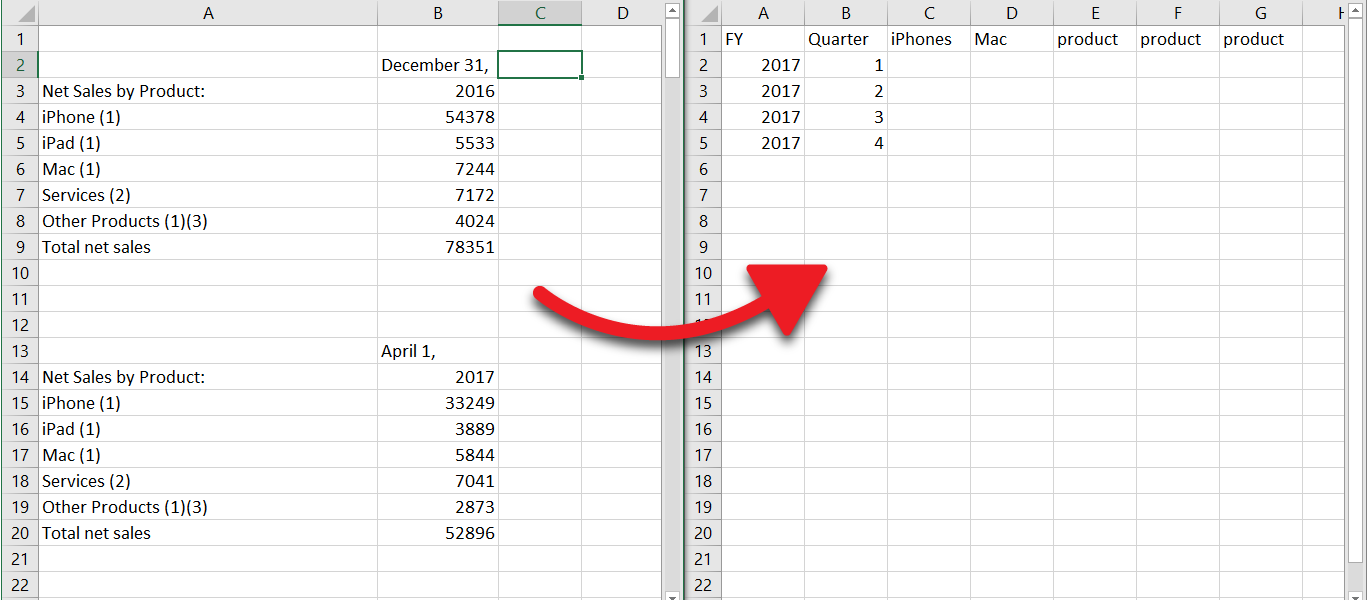

*The data is sourced from Quarterly & Annual Filings from Apple available at https://investor.apple.com/sec-filings/default.aspx*

In [ ]:
import pandas as pd

dataToTransform = pd.read_csv("https://rahuldf.github.io/portfolio/project-3/file-to-transform.csv")

dataToTransform

,Unnamed: 0,Unnamed: 1
0,NaN,"December 31,"
1,Net Sales by Product:,2016
2,iPhone (1),54378
3,iPad (1),5533
4,Mac (1),7244
...,...,...
202,Mac (1),#VALUE!
203,iPad (1),#VALUE!
204,"Wearables, Home and Accessories (1)(2)",#VALUE!
205,Services (3),#VALUE!


In [ ]:
dataToTransform.rename(columns= {'Unnamed: 0': 'C1', 'Unnamed: 1': 'C2'}, inplace=True)
dataToTransform

,C1,C2
0,NaN,"December 31,"
1,Net Sales by Product:,2016
2,iPhone (1),54378
3,iPad (1),5533
4,Mac (1),7244
...,...,...
202,Mac (1),#VALUE!
203,iPad (1),#VALUE!
204,"Wearables, Home and Accessories (1)(2)",#VALUE!
205,Services (3),#VALUE!


Once the data is imported, I am renameing the default column names to something simple like C1 and C2.

Then we are ready to hand pick our data, using the data frame I will pick up each sales value for iPhone in a seperate variable.

In [ ]:
iphone_sale = dataToTransform[dataToTransform['C1'] == 'iPhone (1)']['C2']
iphone_sale

2        54378
13       33249
23       24846
33       28846
44       61576
55       38032
65       29906
75       37185
86       51982
97       31051
107      25986
117      33362
128      55957
139      28962
149      26418
159      26444
170      65597
181      47938
191      39570
201    #VALUE!
Name: C2, dtype: object

A good idea at this point will be to reset it's index values so we can keep a track the number of rows we expect in the final dataframe.

In [ ]:
iphone_sale.reset_index(inplace=True, drop=True)
iphone_sale

0       54378
1       33249
2       24846
3       28846
4       61576
5       38032
6       29906
7       37185
8       51982
9       31051
10      25986
11      33362
12      55957
13      28962
14      26418
15      26444
16      65597
17      47938
18      39570
19    #VALUE!
Name: C2, dtype: object

With this we know we should expect 20 row values or last value at index "19" for each variable that we are creating.

I will now store each product category to a variable to later merge them together.

In [ ]:
ipad_sale = dataToTransform[dataToTransform['C1'] == 'iPad (1)']['C2']
ipad_sale.reset_index(inplace=True, drop=True)
ipad_sale.tail()

15       6797
16       8435
17       7807
18       7368
19    #VALUE!
Name: C2, dtype: object

In [ ]:
mac_sale = dataToTransform[dataToTransform['C1'] == 'Mac (1)']['C2']
mac_sale.reset_index(inplace=True, drop=True)
mac_sale.tail()

15       9032
16       8675
17       9102
18       8235
19    #VALUE!
Name: C2, dtype: object

In [ ]:
service_sale = dataToTransform[dataToTransform['C1'] == 'Services (2)']['C2']
service_sale.reset_index(inplace=True, drop=True)
service_sale.tail()

3    8501
4    8471
5    9190
6    9548
7    9981
Name: C2, dtype: object

For `service_sales` the number of rows is less then usual. (Notice the last index is 7 instead of 19) Let's check back the original data to find out why is this happening. I will call in the last 15 rows of the data frame.

In [ ]:
dataToTransform.tail(15)

,C1,C2
192,Mac (1),8235
193,iPad (1),7368
194,"Wearables, Home and Accessories (1)(2)",8775
195,Services (3),17486
196,Total net sales (4),81434
197,NaN,NaN
198,NaN,NaN
199,NaN,"Sept 25,"
200,Net Sales by Product:,2021
201,iPhone (1),#VALUE!


We can notice that somewhere between the dataframe, Apple decided to change "Services (2)" to "Services (3)" in its Financial Statements.

These numbers in brackets are denoted in financial statements to provide notes about the line item in the financial statement.



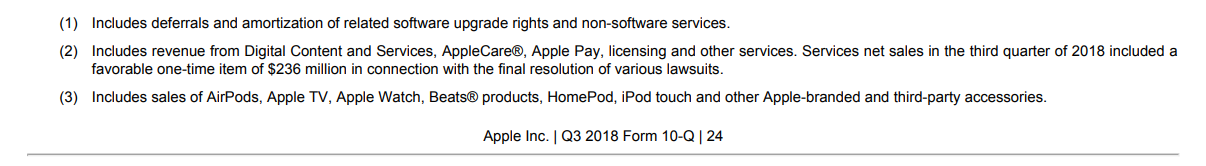

Here is what these notes say in 2018

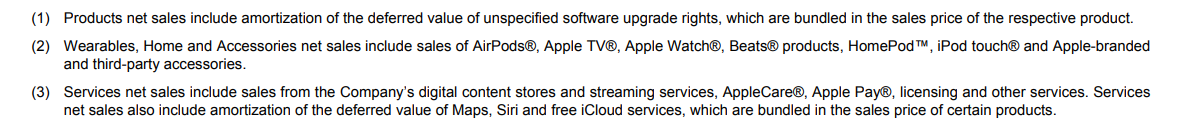

And here are the notes from 2019 statements

We can modify our condition to also indlude rows with "Services (3)". Let's add this condition to the code.

In [ ]:
service_sale = dataToTransform[(dataToTransform['C1'] == 'Services (2)') | (dataToTransform['C1'] == 'Services (3)')]['C2']
service_sale.reset_index(inplace=True, drop=True)
service_sale.tail()

15      14549
16      15761
17      16901
18      17486
19    #VALUE!
Name: C2, dtype: object

After including this condition we can see we have correct number of rows.

Apple also made changes to "Other Products" to be categorised as "Wearables, Home and Accessories" from Financial year 2019. I'll use the combination of these two conditions to retrive this data.

In [ ]:
other_sale = dataToTransform[(dataToTransform['C1'] == 'Other Products (1)(3)') | (dataToTransform['C1'] == 'Wearables, Home and Accessories (1)(2)')]['C2']
other_sale.reset_index(inplace=True, drop=True)
other_sale.tail()

15       7876
16      12971
17       7836
18       8775
19    #VALUE!
Name: C2, dtype: object

We have all the five categories stored under a variable. I will now make a new dataframe to add each category sale data.

I am making a 20 row data frame and insert Quarter number and financial year.

In [ ]:
newDataFrame = pd.DataFrame({'Quarter': range(20)})

newDataFrame['Quarter'][::4] = 'Q1'
newDataFrame['Quarter'][1::4] = 'Q2'
newDataFrame['Quarter'][2::4] = 'Q3'
newDataFrame['Quarter'][3::4] = 'Q4'

newDataFrame.tail()

,Quarter
15,Q4
16,Q1
17,Q2
18,Q3
19,Q4


In [ ]:
finyear = 2017
index = 0

newDataFrame['Financial Year'] = ''

for i in newDataFrame['Quarter']:
    newDataFrame['Financial Year'][index] = finyear
    if 'Q4' in i:
      finyear += 1
    index += 1

newDataFrame = newDataFrame[['Financial Year','Quarter']]

newDataFrame.tail()

,Financial Year,Quarter
15,2020,Q4
16,2021,Q1
17,2021,Q2
18,2021,Q3
19,2021,Q4


Once we have the Financial year and Quarter columns in our dataframe, I will insert all the five categories into this dataframe.

And here is what the final dataframe looks like, clean and organised.

In [ ]:
newDataFrame['iPhone'] = iphone_sale
newDataFrame['iPad'] = ipad_sale
newDataFrame['Mac'] = mac_sale
newDataFrame['Wearables, Home and Accessories'] = other_sale
newDataFrame['Services'] = service_sale

newDataFrame

,Financial Year,Quarter,iPhone,iPad,Mac,"Wearables, Home and Accessories",Services
0,2017,Q1,54378,5533,7244,4024,7172
1,2017,Q2,33249,3889,5844,2873,7041
2,2017,Q3,24846,4969,5592,2735,7266
3,2017,Q4,28846,4831,7170,3231,8501
4,2018,Q1,61576,5862,6895,5489,8471
5,2018,Q2,38032,4113,5848,3954,9190
6,2018,Q3,29906,4741,5330,3740,9548
7,2018,Q4,37185,4089,7411,4234,9981
8,2019,Q1,51982,6729,7416,7308,10875
9,2019,Q2,31051,4872,5513,5129,11450


*- The Q4 values for 2021 are not avalable as these are not released yet.*

Notebook Prepared by **Rahul Fulwadhwa**

LinkedIn - [linkedin.com/in/rahul-fulwadhwa/](https://www.linkedin.com/in/rahul-fulwadhwa/)

Portfolio - [rahuldf.github.io/portfolio](https://rahuldf.github.io/portfolio)